<a href="https://colab.research.google.com/github/vasill23/classwork1_vasilikizafeiropoulou/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df_cor= pd.read_csv("/content/gdrive/MyDrive/top_articles.csv")

In [ ]:
df_cor

source                                              title  \
0      pentapostagma.gr  Κροατία: Η κυβέρνηση θέλει να ελέγξει τις δημο...   
1               palo.gr  "Δίκη στο Open"-Ανώνυμη επιστολή στη FIFA: "Δι...   
2       parapolitika.gr  Παπαθανάσης για τους επενδυτικούς στόχους: Περ...   
3           makeleio.gr  Με τραπεζική κάρτα οι επιβιβάσεις στα ΜΜΜ: Σήμ...   
4        bankingnews.gr  Παπαθανάσης (ΥΠΕΘΟ): Περιμένουμε 2,9% ανάπτυξη...   
...                 ...                                                ...   
23101     iefimerida.gr  Ισπανία: Οσμή σκανδάλου διαφθοράς στο Λαϊκό Κό...   
23102    tomanifesto.gr  Άδωνις Γεωργιάδης: «Τα μέτρα έφεραν αποτελέσμα...   
23103      topontiki.gr  ΚΚΕ: Υπέρ Προανακριτικής για Βορίδη – Αυγενάκη...   
23104        politic.gr  Ρωσία: Αμφιλεγόμενο μέτρο κατά της διαφθοράς σ...   
23105       makeleio.gr  ΠΗΓΑΝ ΝΑ ΤΟΝ ΚΑΨΟΥΝ ΣΑΝ ΤΟ ΠΟΝΤΙΚΙ. ΘΡΙΛΕΡ ΣΤΑ...   

                                                    text        date  
0      Το νομοσχέδιο αναμένεται να ψηφιστεί στη νέα σ...  2024-01-15  
1      Η FIFA έλαβε την προηγούμενη εβδομάδα μια ανών...  2024-01-15  
2      Parapolitika Newsroom "Η Ελλάδα έχει δυναμική,...  2024-01-15  
3      Με μεθοδικές κινήσεις το κράτος συνεχίζει να ε...  2024-01-15  
4      «Πιστεύουμε ότι όλες οι Ελληνίδες και όλοι οι ...  2024-01-15  
...                                                  ...         ...  
23101  NEWSROOM IEFIMERIDA.GR 19/07/2025  08:44 Με τη...  2025-07-19  
23102  Το μεταναστευτικό παραμένει ένα από τα πλέον κ...  2025-07-19  
23103  Μαρία Μητσοπούλου ΜΑΡΙΑ ΜΗΤΣΟΠΟΥΛΟΥ Δική του π...  2025-07-19  
23104  Η Ρωσία δοκιμάζει ένα νέο μέτρο που επιβραβεύε...  2025-07-19  
23105  Η ΕΦΗΜΕΡΙΔΑ ΜΑΚΕΛΕΙΟ ΚΡΟΥΕΙ ΤΟΝ ΚΩΔΩΝΑ ΤΟΥ ΚΙΝ...  2025-07-19  

[23106 rows x 4 columns]

In [ ]:
import re

categories = {
    "Πολιτική": ["πολιτική", "κυβέρνηση", "υπουργός", "διαπλοκή", "βουλευτής", "υπουργείο"],
    "Δημόσια Διοίκηση": ["δημόσιο", "δημόσια διοίκηση", "χρηματοδότηση"],
    "Ιδιωτικός Τομέας": ["εταιρεία", "ιδιώτης", "οικονομικό όφελος", "ιδωτικός", "επένδυση", "ΟΠΕΚΕΠΕ", "οικονομικό σκάνδαλο"],
    "Δικαιοσύνη": ["Τέμπη", "δικαιοσύνη", "δικαστικός λειτουργός", "απονομή δικαιοσύνης", "δικαστική διαφθορά", "έγκλημα", "συγκάλυψη"],
    "Υγεία": ["τομέας υγείας", "νοσοκομείο", "γιατρός", "νοσηλευτής"]}


df_cor["category"] = "Άλλη"
df_cor["matched_keywords"] = ""


for idx, row in df_cor.iterrows():
    text_to_search = str(row["title"]) + " " + str(row["text"])
    found = False
    for cat, keywords in categories.items():
        pattern = "|".join(keywords)
        matches = re.findall(pattern, text_to_search, flags=re.IGNORECASE)
        if matches:
            df_cor.at[idx, "category"] = cat
            df_cor.at[idx, "matched_keywords"] = ", ".join(matches)
            found = True
            break
    if not found:
        df_cor.at[idx, "matched_keywords"] = ""

print(df_cor[["title", "category", "matched_keywords"]].head())

                                               title  category  \
0  Κροατία: Η κυβέρνηση θέλει να ελέγξει τις δημο...  Πολιτική   
1  "Δίκη στο Open"-Ανώνυμη επιστολή στη FIFA: "Δι...      Άλλη   
2  Παπαθανάσης για τους επενδυτικούς στόχους: Περ...  Πολιτική   
3  Με τραπεζική κάρτα οι επιβιβάσεις στα ΜΜΜ: Σήμ...  Πολιτική   
4  Παπαθανάσης (ΥΠΕΘΟ): Περιμένουμε 2,9% ανάπτυξη...  Πολιτική   

                                    matched_keywords  
0                               κυβέρνηση, βουλευτής  
1                                                     
2  υπουργός, υπουργός, υπουργός, πολιτική, πολιτι...  
3                      πολιτική, Υπουργός, κυβέρνηση  
4             υπουργός, πολιτική, πολιτική, υπουργός  


In [ ]:
df_corL=df_cor[["title", "category", "text", "matched_keywords", "date"]]
df_corL["category"].value_counts()

category
Πολιτική            18328
Άλλη                 2406
Δικαιοσύνη           1239
Δημόσια Διοίκηση      638
Ιδιωτικός Τομέας      428
Υγεία                  67
Name: count, dtype: int64

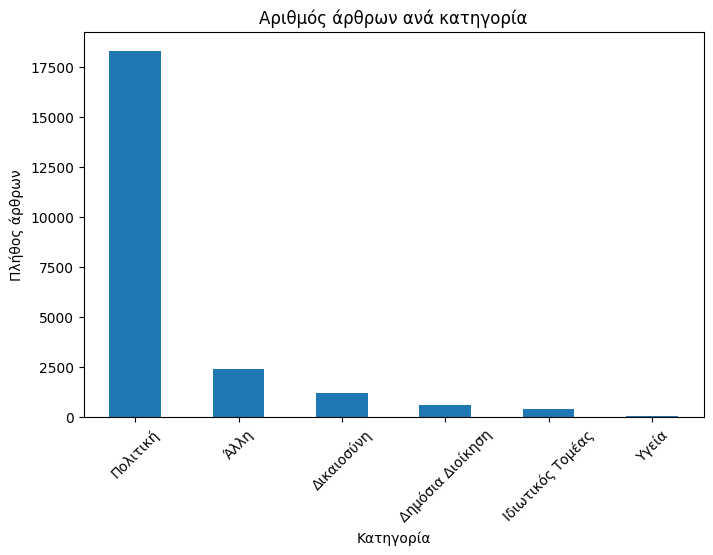

In [ ]:
import matplotlib.pyplot as plt

counts = df_corL["category"].value_counts()

plt.figure(figsize=(8,5))
counts.plot(kind="bar")
plt.title("Αριθμός άρθρων ανά κατηγορία")
plt.xlabel("Κατηγορία")
plt.ylabel("Πλήθος άρθρων")
plt.xticks(rotation=45)
plt.show()

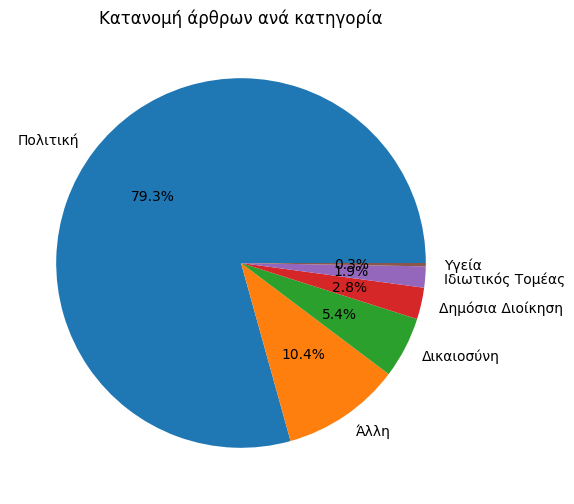

In [ ]:
plt.figure(figsize=(6,6))
counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Κατανομή άρθρων ανά κατηγορία")
plt.ylabel("")
plt.show()

In [ ]:
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
!python -m spacy download el_core_news_sm
nlp = spacy.load("el_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 62.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


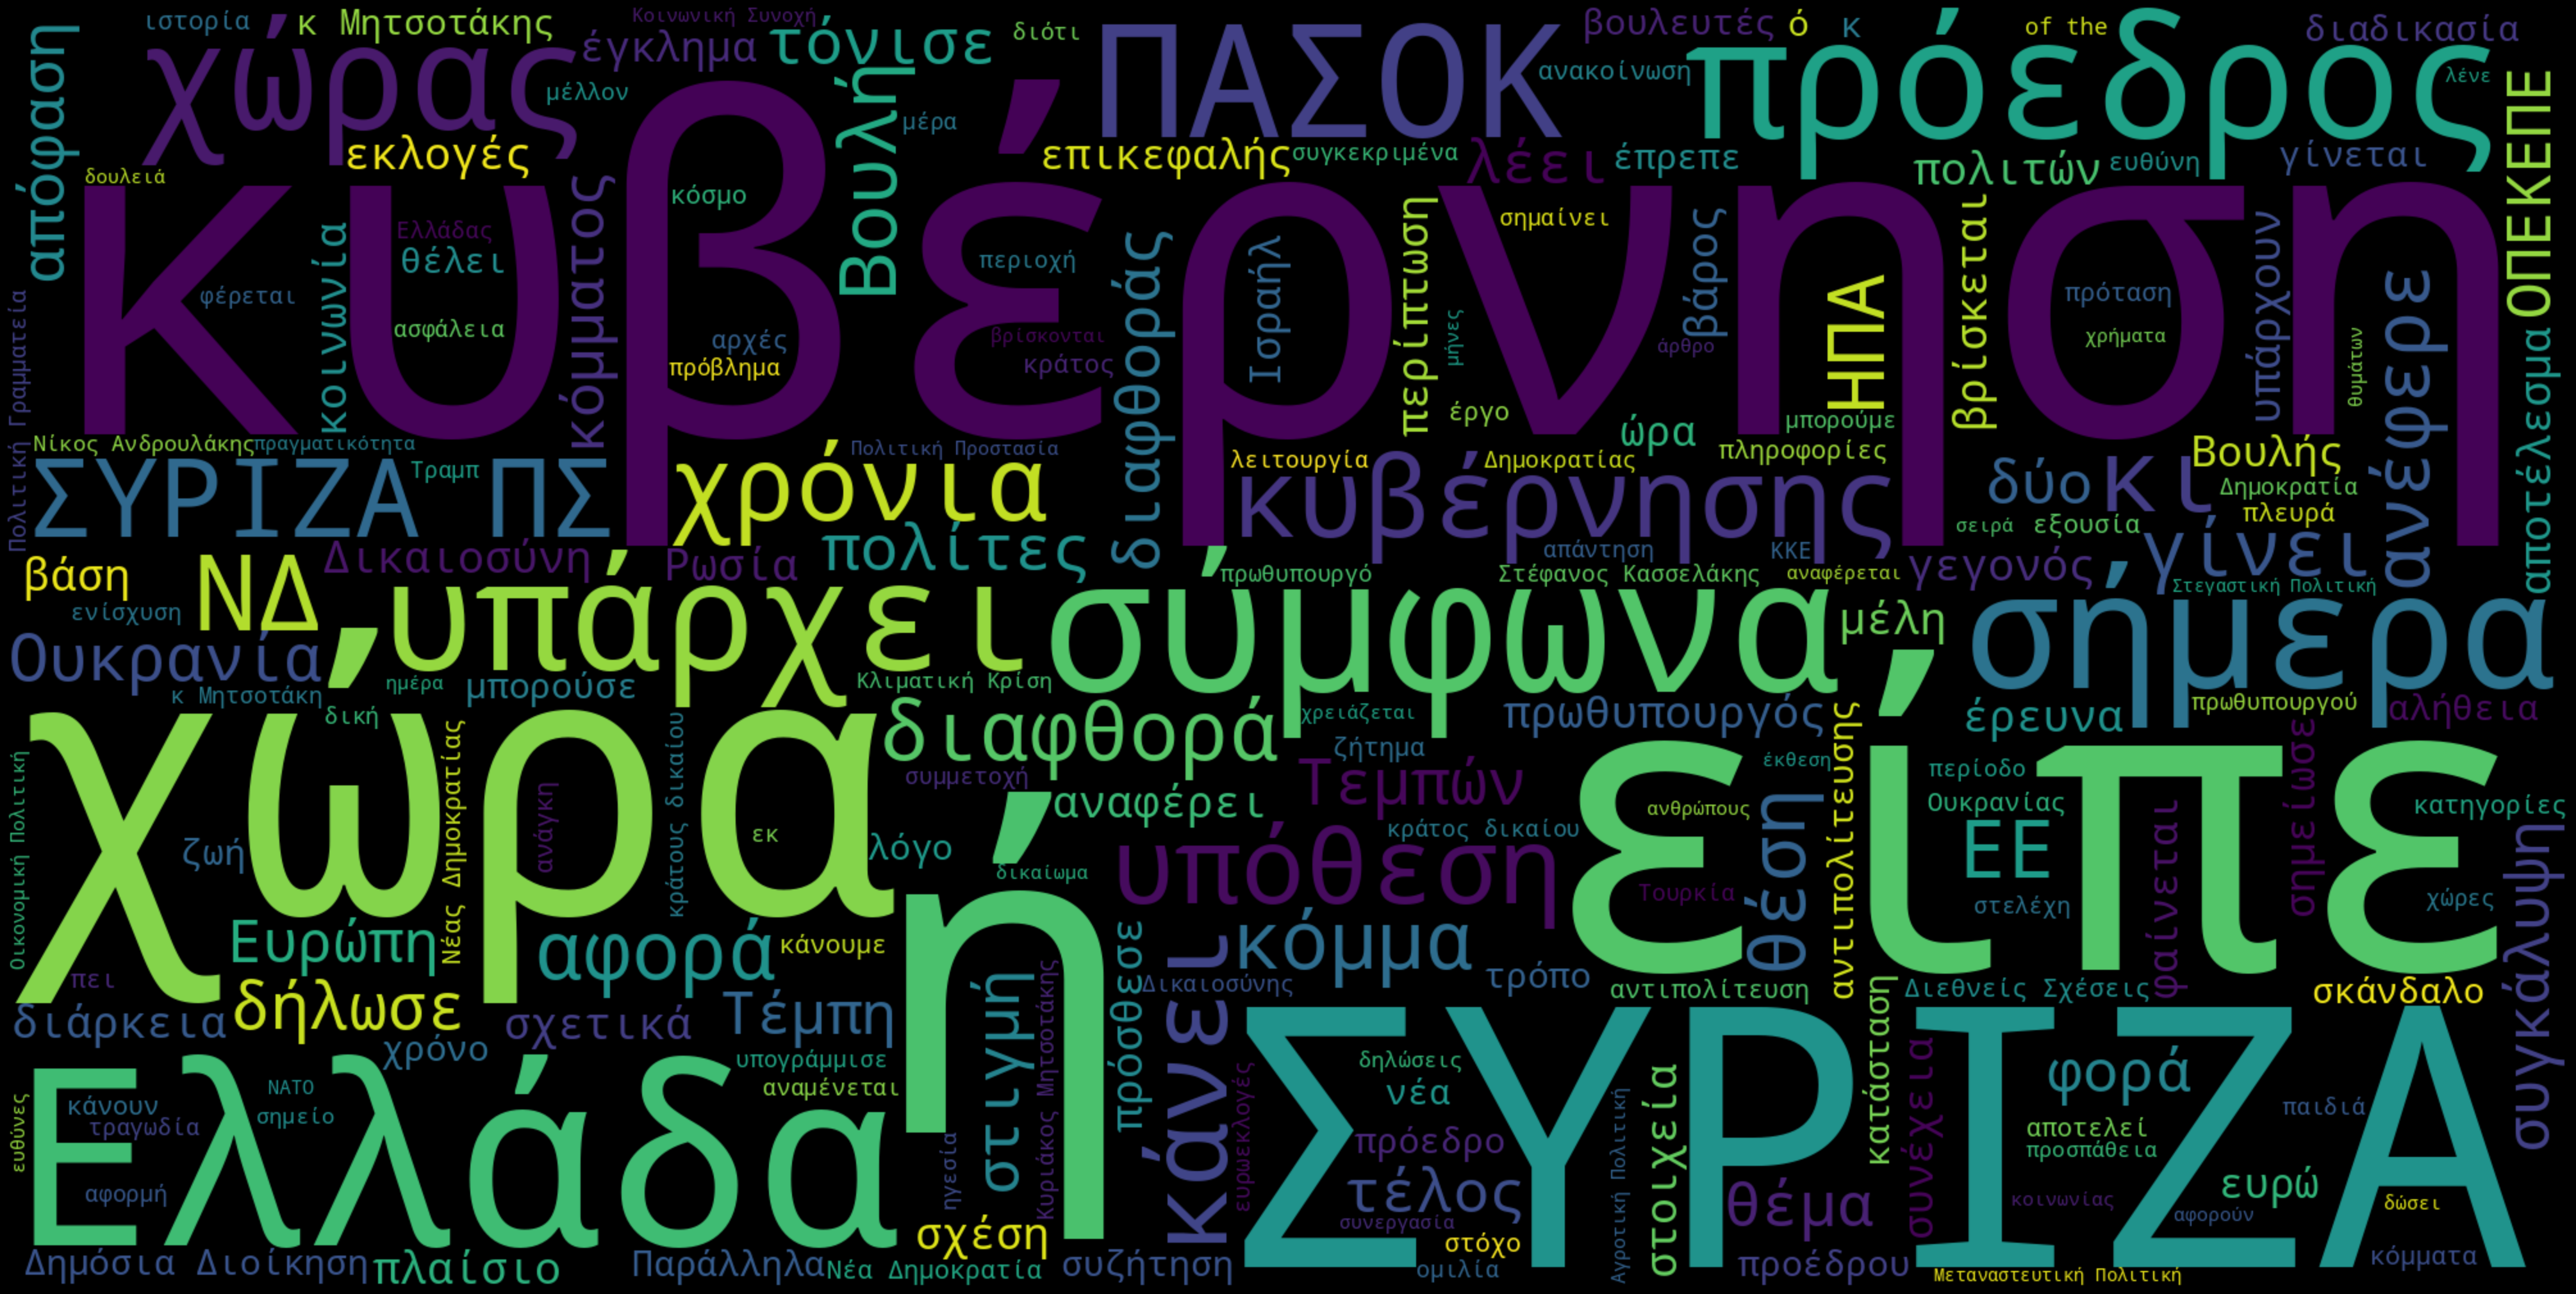

In [ ]:
all_text = " ".join(df_cor["text"].dropna().astype(str))

wordcloud1 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(all_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

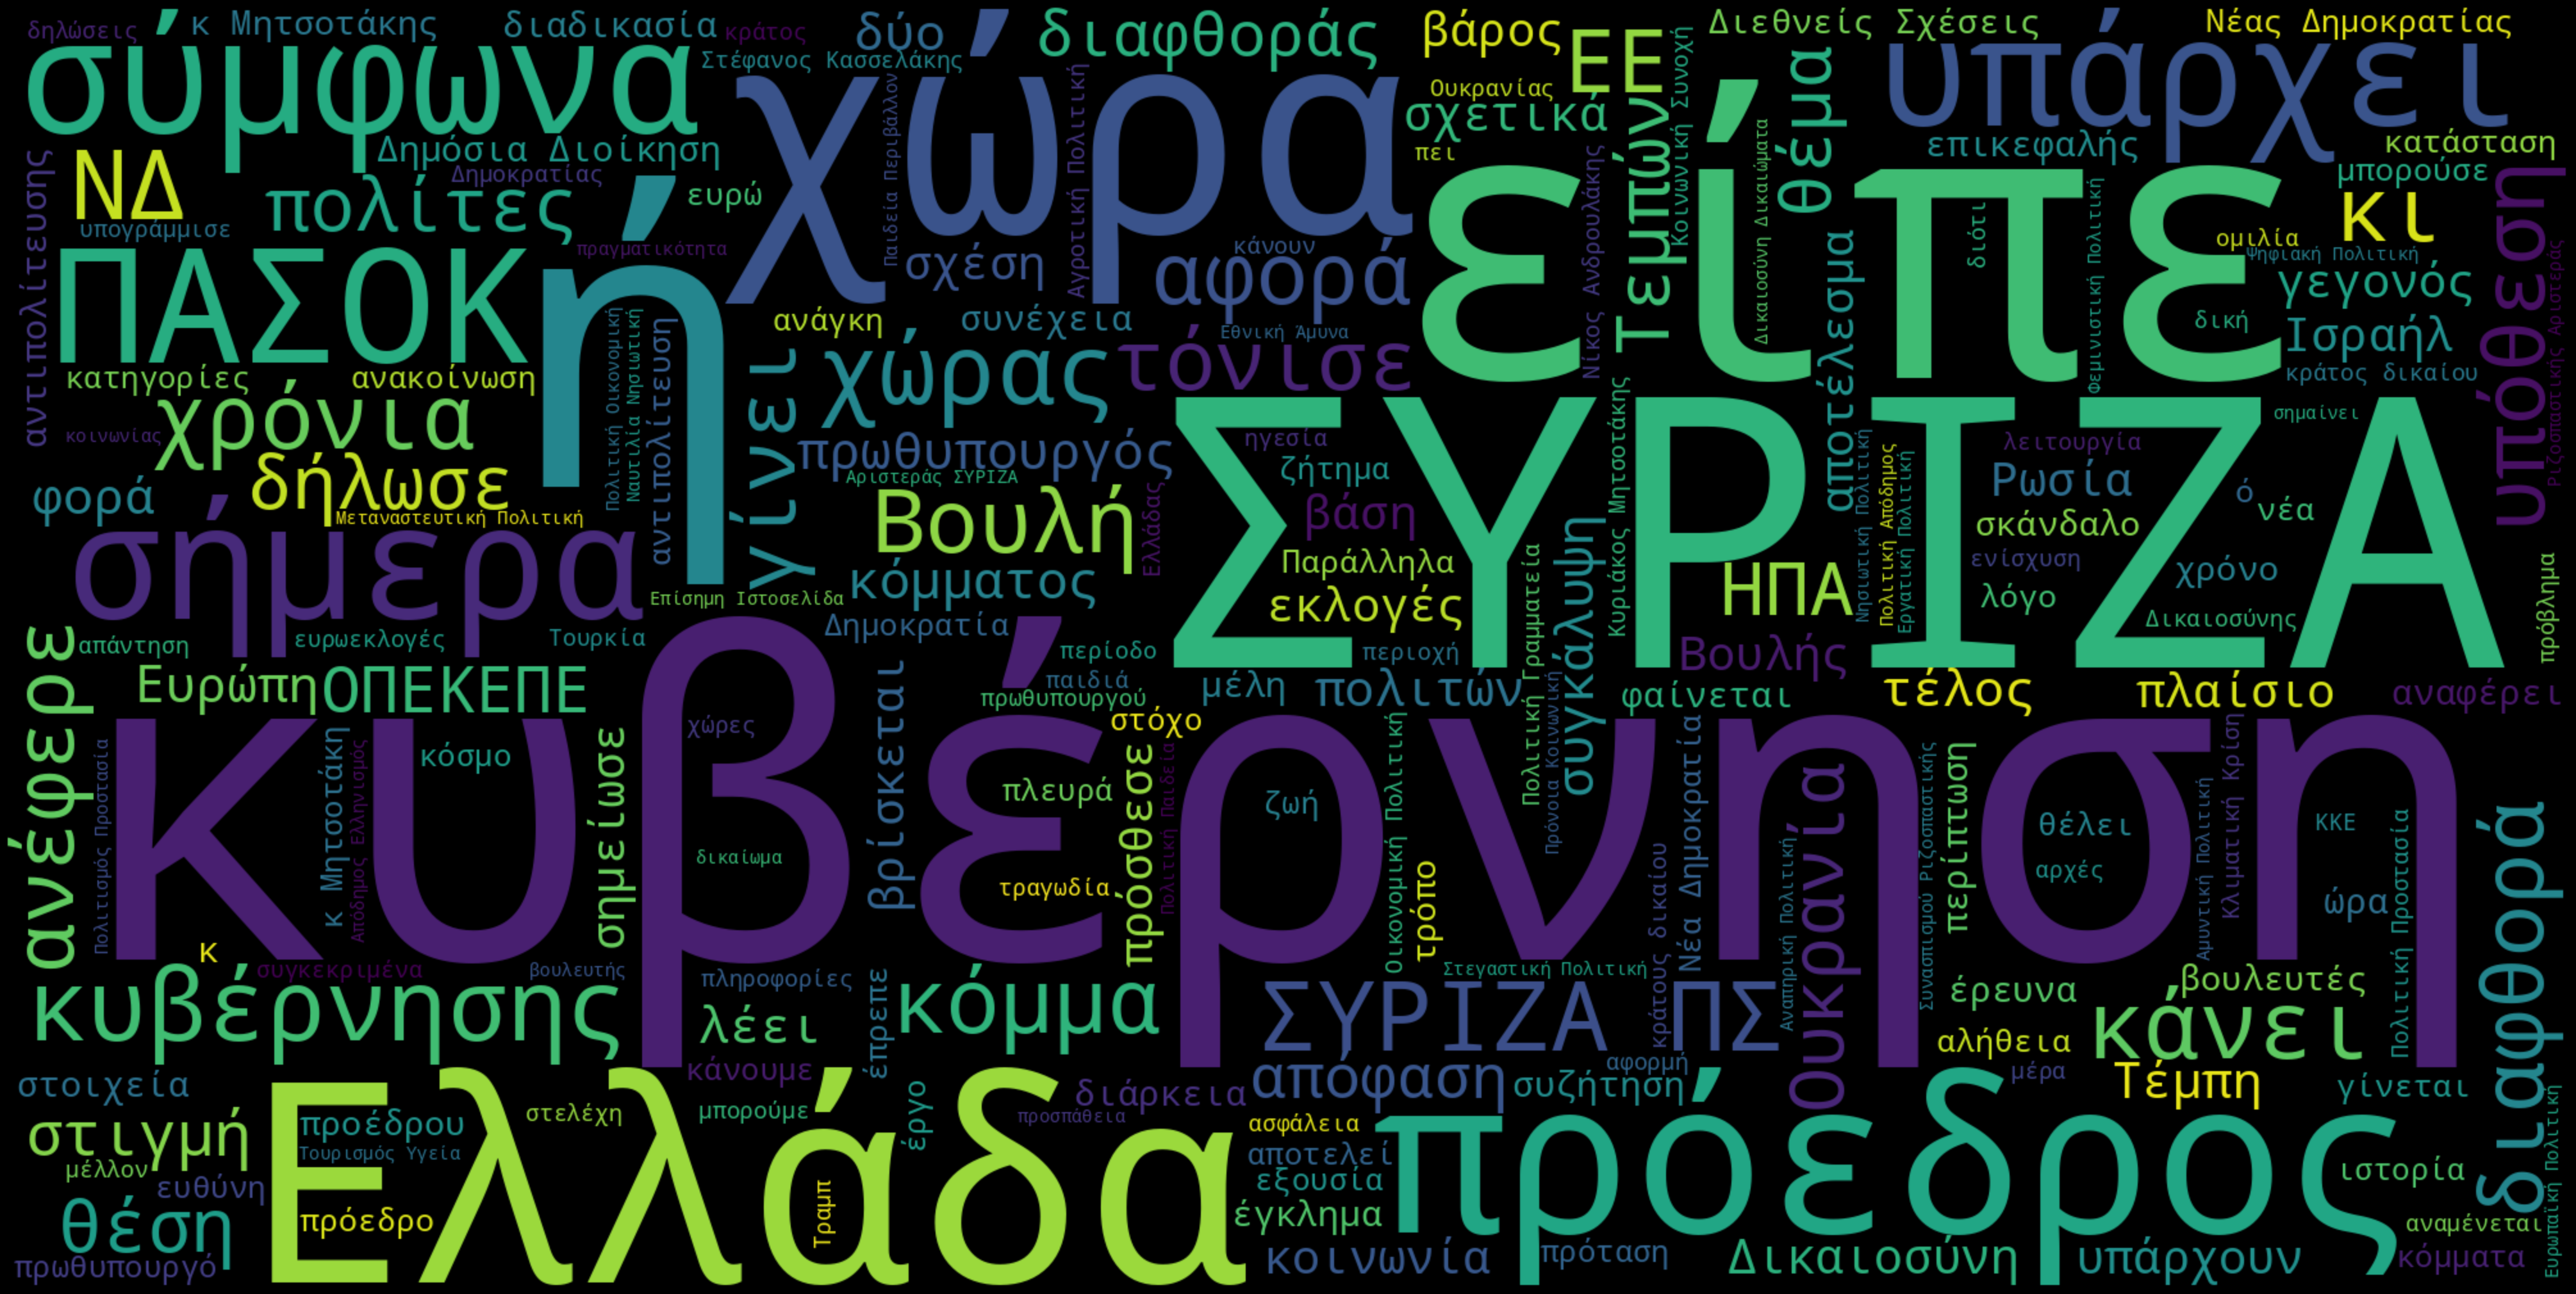

In [ ]:
corr_pol_text = " ".join(df_cor[df_cor["category"]=="Πολιτική"]["text"].dropna().astype(str))
wordcloud1 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(corr_pol_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()